# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx


In [0]:
downloaded_2 = drive.CreateFile({'id':id}) 
downloaded_2.GetContentFile('train_data.csv')  
project_data = pd.read_csv('train_data.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'

In [8]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe


In [0]:
downloaded_3 = drive.CreateFile({'id':id}) 
downloaded_3.GetContentFile('resources.csv')  
resources_data = pd.read_csv('resources.csv')
# Dataset is now stored in a Pandas Dataframe

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [11]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [12]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)


Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [20]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations r n r nThe materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills r nThey also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagem

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.5 Preparing data for models

In [0]:
#Pre-processing teacher prefix:-

In [0]:
project_data = project_data.replace({'teacher_prefix':np.nan},"")
a=list(project_data['teacher_prefix'].unique())

In [24]:
a.pop(4)

''

In [25]:
a

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']

In [0]:
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+','_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-','_')

In [0]:
price_data=resource_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()

In [0]:
project_data=pd.merge(project_data, price_data, on='id', how='left')

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [30]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [0]:
#As the total data has odd no of total data points, we will even the no of total data points so 
#that the train test split can hapeen based on the test size.

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Train-test splitting:-

In [0]:
Y = project_data['project_is_approved'].values 

In [0]:
X = project_data.drop('project_is_approved', axis=1)

In [34]:
X.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'], dtype=object)

In [35]:
X.shape

(109248, 19)

In [36]:
Y.shape

(109248,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xt, Xtest, Yt, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0, stratify= Y)
Xtr, Xcv, Ytr, Ycv = train_test_split(Xt, Yt, test_size=0.33, random_state=0, stratify= Yt)

In [39]:
print("The shape of training data is:")
print(Xtr.shape)
print(Ytr.shape)
print('==========')
print("The shape of test data is:")
print(Xtest.shape)
print(Ytest.shape)
print('==========')
print("The shape of CV data is:")
print(Xcv.shape)
print(Ycv.shape)

The shape of training data is:
(49041, 19)
(49041,)
The shape of test data is:
(36052, 19)
(36052,)
The shape of CV data is:
(24155, 19)
(24155,)


# Preprocessing essay data:-

In [40]:
preprocessed_1=[]
for sent in tqdm(Xtr['essay'].values):    
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:25<00:00, 1915.35it/s]


In [41]:
preprocessed_1[1000]

'the students spark curiosity i love they interested learning change world help people i want everything i keep passion alive my classroom filled students curious excited learning they passion nature we currently working garden project also done project monarch butterflies we project based learning school students drive learn the students always choose project helping people nature these resources allow students explore passions stem gardening we love giving students time complete stem challenges get wheels turning creativity flowing we also incorporating art project making steam project the students use paints express learned this project make difference allowing students may not opportunity explore develop passion stem use stem bundles paint'

In [42]:
preprocessed_2=[]
for sent in tqdm(Xtest['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:18<00:00, 1909.19it/s]


In [43]:
preprocessed_3=[]
for sent in tqdm(Xcv['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:13<00:00, 1848.62it/s]


# Preprocessing project title data:-

In [44]:
preprocessed_title_1=[]
for sent in tqdm(Xtr['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:01<00:00, 37626.88it/s]


In [45]:
preprocessed_title_2=[]
for sent in tqdm(Xtest['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:00<00:00, 37322.17it/s]


In [46]:
preprocessed_title_3=[]
for sent in tqdm(Xcv['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:00<00:00, 37874.29it/s]


# Features to be considered 
We are going to consider

school_state : categorical data
clean_categories : categorical data
clean_subcategories : categorical data
project_grade_category : categorical data
teacher_prefix : categorical data

project_title : text data

text : text data

project_resource_summary: text data (optinal)

quantity : numerical (optinal)

sentiment's score of essay data

teacher_number_of_previously_posted_projects : numerical

price : numerical

number of words in essay

number of words in projects_title

# 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

 1. Subject Categories:-

In [47]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
subject_categories_vect_1= vectorizer_1.fit_transform(Xtr['clean_categories'].values)
print(vectorizer_1.get_feature_names())
print('The shape of the train matrix after one hot encoding is:', subject_categories_vect_1.shape)
subject_categories_vect_2=vectorizer_1.transform(Xtest['clean_categories'].values)
subject_categories_vect_3=vectorizer_1.transform(Xcv['clean_categories'].values)
print('The shape of the CV matrix after one hot encoding is:', subject_categories_vect_2.shape)
print('The shape of the test matrix after one hot encoding is:', subject_categories_vect_3.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
The shape of the train matrix after one hot encoding is: (49041, 9)
The shape of the CV matrix after one hot encoding is: (36052, 9)
The shape of the test matrix after one hot encoding is: (24155, 9)


2. Subject sub_categories:- 

In [48]:
# we use count vectorizer to convert the values into one 
vectorizer_2=CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_vect_1= vectorizer_2.fit_transform(Xtr['clean_subcategories'].values)
print(vectorizer_2.get_feature_names())
print('The shape of train encoded subcategories is:',sub_categories_vect_1.shape)
sub_categories_vect_2=vectorizer_2.transform(Xtest['clean_subcategories'].values)
sub_categories_vect_3=vectorizer_2.transform(Xcv['clean_subcategories'].values)
print('The shape of the CV encoded subcategories is:', sub_categories_vect_2.shape)
print('The shape of the test encoded subcategories is:', sub_categories_vect_3.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
The shape of train encoded subcategories is: (49041, 30)
The shape of the CV encoded subcategories is: (36052, 30)
The shape of the test encoded subcategories is: (24155, 30)


3. School State

In [49]:
vectorizer_3=CountVectorizer(lowercase=False, binary=True)
school_state_vect_1 = vectorizer_3.fit_transform(Xtr['school_state'].values)
print(vectorizer_3.get_feature_names())
school_state_vect_2 = vectorizer_3.transform(Xtest['school_state'].values)
school_state_vect_3 = vectorizer_3.transform(Xcv['school_state'].values)
print('The shape of the Train school state encoded subcategories is:', school_state_vect_1.shape)
print('The shape of the CV school state encoded subcategories is:', school_state_vect_2.shape)
print('The shape of the Test school state encoded subcategories is:', school_state_vect_3.shape)


['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
The shape of the Train school state encoded subcategories is: (49041, 51)
The shape of the CV school state encoded subcategories is: (36052, 51)
The shape of the Test school state encoded subcategories is: (24155, 51)


4. Teacher Prefix:-

In [50]:
vectorizer_4=CountVectorizer(vocabulary=a,lowercase=False, binary=True)
prefix_1 = vectorizer_4.fit_transform(Xtr['teacher_prefix'].values)
print(vectorizer_4.get_feature_names())
prefix_2 = vectorizer_4.transform(Xtest['teacher_prefix'].values)
prefix_3 = vectorizer_4.transform(Xcv['teacher_prefix'].values)
print('The shape of the Train encoded teacher prefix is:', prefix_1.shape)
print('The shape of the CV encoded teacher prefix is:', prefix_2.shape)
print('The shape of the Test encoded teacher prefix is:', prefix_3.shape)



['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
The shape of the Train encoded teacher prefix is: (49041, 5)
The shape of the CV encoded teacher prefix is: (36052, 5)
The shape of the Test encoded teacher prefix is: (24155, 5)


5. Project grade Category

In [51]:
vectorizer_5=CountVectorizer(lowercase=False, binary= True)
grade_category_vec_1=vectorizer_5.fit_transform(Xtr['project_grade_category'].values)
grade_category_vec_2=vectorizer_5.transform(Xtest['project_grade_category'].values)
grade_category_vec_3=vectorizer_5.transform(Xcv['project_grade_category'].values)
print(vectorizer_5.get_feature_names())
print('The shape of the Train encoded teacher_prefix is:', grade_category_vec_1.shape)
print('The shape of the CV encoded teacher_prefix is:', grade_category_vec_2.shape)
print('The shape of the Test encodedteacher_prefix is:', grade_category_vec_3.shape)


['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
The shape of the Train encoded teacher_prefix is: (49041, 4)
The shape of the CV encoded teacher_prefix is: (36052, 4)
The shape of the Test encodedteacher_prefix is: (24155, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

1. Essay data:- 

In [0]:
vectorizer_6 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_6.fit(preprocessed_1)
bow1=vectorizer_6.transform(preprocessed_1)
bow2=vectorizer_6.transform(preprocessed_2)
bow3=vectorizer_6.transform(preprocessed_3)


In [54]:
print(bow1.shape)
print(bow2.shape)
print(bow3.shape)

(49041, 5000)
(36052, 5000)
(24155, 5000)


2. Project title:-

In [0]:
vectorizer_7 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_7.fit(preprocessed_title_1)
bow4=vectorizer_7.transform(preprocessed_title_1)
bow5=vectorizer_7.transform(preprocessed_title_2)
bow6=vectorizer_7.transform(preprocessed_title_3)


In [57]:
print(bow4.shape)
print(bow5.shape)
print(bow6.shape)

(49041, 3756)
(36052, 3756)
(24155, 3756)


#### 1.5.2.2 TFIDF vectorizer

1. Essay data:-

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_8 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_8.fit(preprocessed_1)
tfidf_1 = vectorizer_8.transform(preprocessed_1)
tfidf_2 = vectorizer_8.transform(preprocessed_2)
tfidf_3 = vectorizer_8.transform(preprocessed_3)
print('The shape of essay tfidf train data is',tfidf_1.shape)
print('The shape of essay tfidf test data is',tfidf_2.shape)
print('The shape of essay tfidf CV data is',tfidf_3.shape)

The shape of essay tfidf train data is (49041, 5000)
The shape of essay tfidf test data is (36052, 5000)
The shape of essay tfidf CV data is (24155, 5000)


2. Project Title:- 

In [0]:
vectorizer_9 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_9.fit(preprocessed_title_1)
tfidf_4=vectorizer_9.transform(preprocessed_title_1)
tfidf_5=vectorizer_9.transform(preprocessed_title_2)
tfidf_6=vectorizer_9.transform(preprocessed_title_3)


In [60]:
print(tfidf_4.shape)
print(tfidf_5.shape)
print(tfidf_6.shape)

(49041, 3756)
(36052, 3756)
(24155, 3756)


In [61]:
if not os.path.exists('glove.6B.zip'):
    ! wget http://nlp.stanford.edu/data/glove.6B.zip
if not os.path.exists('glove.6B.300d.txt'):
    ! unzip glove.6B.zip

--2019-07-17 12:42:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-07-17 12:42:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-07-17 12:42:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# 3. AVG W2V:-

In [62]:
preprocessed = preprocessed_1 + preprocessed_2 + preprocessed_3
preprocessed_title = preprocessed_title_1 + preprocessed_title_2 + preprocessed_title_3


# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




945it [00:00, 9449.47it/s]

Loading Glove Model


400000it [00:38, 10388.48it/s]


Done. 400000  words loaded!
all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [63]:
words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

Avg_W2V on Essay:-

In [65]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_1.append(vector)

print(len(avg_w2v_vectors_1))
print(len(avg_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:13<00:00, 3560.36it/s]

49041
300


In [66]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_2.append(vector)

print(len(avg_w2v_vectors_2))
print(len(avg_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:09<00:00, 3613.54it/s]

36052
300


In [67]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_3.append(vector)

print(len(avg_w2v_vectors_3))
print(len(avg_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:06<00:00, 3636.00it/s]

24155
300


Avg_W2V on Project_title:-

In [68]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_1.append(vector)

print(len(avg_w2v_title_1))
print(len(avg_w2v_title_1[0]))

100%|██████████| 49041/49041 [00:00<00:00, 72586.29it/s]

49041
300


In [69]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_2.append(vector)

print(len(avg_w2v_title_2))
print(len(avg_w2v_title_2[0]))

100%|██████████| 36052/36052 [00:00<00:00, 75490.19it/s]

36052
300


In [70]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_3.append(vector)

print(len(avg_w2v_title_3))
print(len(avg_w2v_title_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 73220.00it/s]

24155
300


TFIDF W2V on Essay:-

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_1 = TfidfVectorizer()
tfidf_model_1.fit(preprocessed_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_1 = dict(zip(tfidf_model_1.get_feature_names(), list(tfidf_model_1.idf_)))
tfidf_words_1 = set(tfidf_model_1.get_feature_names())

In [72]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_1.append(vector)

print(len(tfidf_w2v_vectors_1))
print(len(tfidf_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [01:24<00:00, 582.35it/s]

49041
300


In [73]:
tfidf_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_2.append(vector)

print(len(tfidf_w2v_vectors_2))
print(len(tfidf_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [01:01<00:00, 586.38it/s]

36052
300


In [74]:
tfidf_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_3.append(vector)

print(len(tfidf_w2v_vectors_3))
print(len(tfidf_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:41<00:00, 578.81it/s]

24155
300


Tf-idf W2V on project_title:-

In [0]:
tfidf_title_model_1 = TfidfVectorizer()
tfidf_title_model_1.fit(preprocessed_title_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary1 = dict(zip(tfidf_title_model_1.get_feature_names(), list(tfidf_title_model_1.idf_)))
tfidf_title_words_1 = set(tfidf_title_model_1.get_feature_names())

In [76]:
tfidf_title_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_1.append(vector)

print(len(tfidf_title_w2v_vectors_1))
print(len(tfidf_title_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:01<00:00, 28730.50it/s]

49041
300


In [77]:
tfidf_title_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_2.append(vector)

print(len(tfidf_title_w2v_vectors_2))
print(len(tfidf_title_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:01<00:00, 33229.63it/s]

36052
300


In [78]:
tfidf_title_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_3.append(vector)

print(len(tfidf_title_w2v_vectors_3))
print(len(tfidf_title_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 29146.61it/s]

24155
300


### 1.5.3 Vectorizing Numerical features

Vectorizing price data:-

In [79]:
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

price_scalar = Normalizer()
price_scalar.fit(Xtr['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_1 = price_scalar.transform(Xtr['price'].values.reshape(1, -1))
price_standardized_2 = price_scalar.transform(Xtest['price'].values.reshape(1, -1))
price_standardized_3 = price_scalar.transform(Xcv['price'].values.reshape(1, -1))

print(price_standardized_1.shape)
print(price_standardized_2.shape)
print(price_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [80]:
price_standardized_1

array([[0.00893773, 0.00095084, 0.00174673, ..., 0.00453539, 0.00366684,
        0.00254176]])

Vectorizing previous projects data:-

In [81]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

previousproject_scalar = Normalizer()
previousproject_scalar.fit(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previousproject_standardized_1 = previousproject_scalar.transform(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_2 = previousproject_scalar.transform(Xtest['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_3 = previousproject_scalar.transform(Xcv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(previousproject_standardized_1.shape)
print(previousproject_standardized_2.shape)
print(previousproject_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [82]:
previousproject_standardized_1

array([[0.        , 0.        , 0.00045655, ..., 0.00060873, 0.00045655,
        0.00076092]])

Vectorizing price data:-

In [83]:
from sklearn.preprocessing import Normalizer

quantity_vect=Normalizer()
quantity_vect_1=quantity_vect.fit_transform(Xtr['quantity'].values.reshape(1,-1))
quantity_vect_2=quantity_vect.transform(Xtest['quantity'].values.reshape(1,-1))
quantity_vect_3=quantity_vect.transform(Xcv['quantity'].values.reshape(1,-1))
print(quantity_vect_1.shape)
print(quantity_vect_2.shape)
print(quantity_vect_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [84]:
quantity_vect_1

array([[0.00070946, 0.00496619, 0.00014189, ..., 0.00042567, 0.00042567,
        0.00014189]])

### 1.5.4 Merging all the above features

- We need to merge all the numerical vectors i.e catogorical, text, numerical vectors

Set-1 :-

In [85]:
from scipy.sparse import hstack
X_train_1 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, bow1, bow4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_1.shape

(49041, 8858)

In [86]:
from scipy.sparse import hstack
X_test_1 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, bow2, bow5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_1.shape

(36052, 8858)

In [87]:
from scipy.sparse import hstack
X_cv_1 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, bow3, bow6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_1.shape

(24155, 8858)

Set-2 :-

In [88]:
from scipy.sparse import hstack
X_train_2 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, tfidf_1, tfidf_4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_2.shape

(49041, 8858)

In [89]:
from scipy.sparse import hstack
X_test_2 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, tfidf_2, tfidf_5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_2.shape

(36052, 8858)

In [90]:
from scipy.sparse import hstack
X_cv_2 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, tfidf_3, tfidf_6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_2.shape

(24155, 8858)

Set-3 :-

In [91]:
from scipy.sparse import hstack
X_train_3 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, avg_w2v_vectors_1, avg_w2v_title_1, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_3.shape

(49041, 702)

In [92]:
from scipy.sparse import hstack
X_test_3 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, avg_w2v_vectors_2, avg_w2v_title_2, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_3.shape

(36052, 702)

In [93]:
from scipy.sparse import hstack
X_cv_3 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, avg_w2v_vectors_3, avg_w2v_title_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_3.shape

(24155, 702)

Set-4 :-

In [94]:
from scipy.sparse import hstack
X_train_4 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, tfidf_w2v_vectors_1, tfidf_title_w2v_vectors_1, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_4.shape

(49041, 702)

In [95]:
from scipy.sparse import hstack
X_test_4 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, tfidf_w2v_vectors_2, tfidf_title_w2v_vectors_2, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_4.shape

(36052, 702)

In [96]:
from scipy.sparse import hstack
X_cv_4 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, tfidf_w2v_vectors_3, tfidf_title_w2v_vectors_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_4.shape

(24155, 702)

# Assignment: DECISION TREES

<h2>2.4 Appling DECISION TREES on different kind of featurization as mentioned in the instructions</h2>

<br>Apply DECISION TREES on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Tree on BOW,<font color='red'> SET 1</font>

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
auc_1=[]
auc_2=[]


In [0]:
best_depth_1 =  [1, 5, 10, 20, 50, 100, 500]

In [100]:
print(X_train_1.shape)
print(Ytr.shape)

(49041, 8858)
(49041,)


Best Depth:-

In [102]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth_1):
    clf=DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(X_train_1, Ytr)
    Y_1=clf.predict(X_train_1)
    roc_auc_1=roc_auc_score(Ytr, Y_1)
    auc_1.append(roc_auc_1)
    Y_2=clf.predict(X_cv_1)
    roc_auc_2=roc_auc_score(Ycv, Y_2)
    auc_2.append(roc_auc_2)

100%|██████████| 7/7 [05:48<00:00, 75.12s/it]



Auc values v/s best_depth plot:-

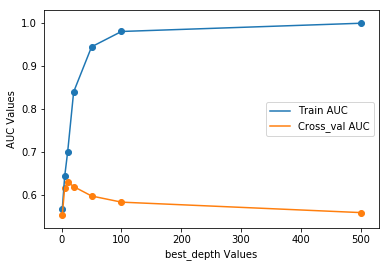

In [103]:
plt.plot(best_depth_1, auc_1, label='Train AUC')
plt.plot(best_depth_1, auc_2, label='Cross_val AUC')
plt.scatter(best_depth_1, auc_1)
plt.scatter(best_depth_1, auc_2)
plt.xlabel('best_depth Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

# Observation:-

In [104]:
print('From the above plot, depth={} results on decent scores on both train and CV data'.format(10))

From the above plot, depth=10 results on decent scores on both train and CV data


Minimum No of Samples:-

In [105]:
min_samples=[5, 10, 100, 500]
auc_3=[]
auc_4=[]

from sklearn.metrics import roc_auc_score
for i in tqdm(min_samples):
    clf=DecisionTreeClassifier(min_samples_split=i, class_weight='balanced')
    clf.fit(X_train_1, Ytr)
    Y_1=clf.predict(X_train_1)
    roc_auc_3=roc_auc_score(Ytr, Y_1)
    auc_3.append(roc_auc_3)
    Y_2=clf.predict(X_cv_1)
    roc_auc_4=roc_auc_score(Ycv, Y_2)
    auc_4.append(roc_auc_4)

100%|██████████| 4/4 [07:18<00:00, 107.25s/it]


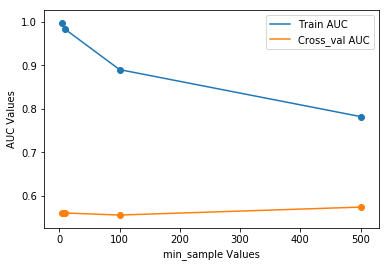

In [106]:
plt.plot(min_samples, auc_3, label='Train AUC')
plt.plot(min_samples, auc_4, label='Cross_val AUC')
plt.scatter(min_samples, auc_3)
plt.scatter(min_samples, auc_4)
plt.xlabel('min_sample Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [107]:
print('From the above plot, min_samples={} results on decent scores on both train and CV data'.format(500))

From the above plot, min_samples=500 results on decent scores on both train and CV data


# Preparing Model-1 with best alpha:-

In [108]:

clf=DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
y_pred= clf.predict(X_test_1)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with C={} on test data is: {}'.format(10, (roc_auc)))

The AUC score with C=10 on test data is: 0.646650533069574


# ROC Curve:-

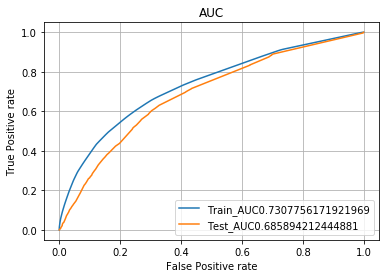

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10,  min_samples_split=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
Y_1=clf.predict_proba(X_train_1)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_1)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [110]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(10, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=10 and min_split=500 on train and test data are 0.7307756171921969 and 0.685894212444881


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
Y_1=clf.predict(X_train_1)
Y_2=clf.predict(X_test_1)


In [113]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))


Train confusion matrix
[[ 5307  2119]
 [14997 26618]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

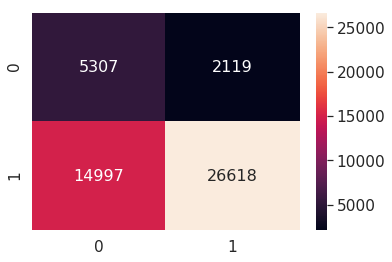

In [115]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')


# Confusion Matrix on Test data:-

In [116]:
print('Test confusion matrix')
confusion_matrix(Ytest, Y_2)

Test confusion matrix


array([[ 3855,  1604],
       [12631, 17962]])

In [0]:
conf_matrix_test_df1=pd.DataFrame(confusion_matrix(Ytest, Y_2))

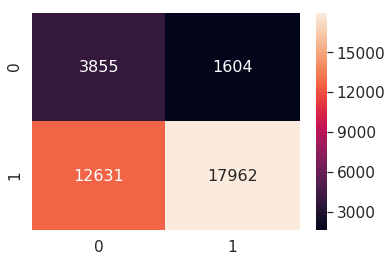

In [118]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_test_df1, annot=True, annot_kws={"size": 16}, fmt='g' )

False positives:-

In [0]:
fp1=[]
for i in range(len(Ytest)):
  if Ytest[i]==0 and Y_2[i]==1:
    fp1.append(i)

In [0]:
Xtest1_new=Xtest.iloc[fp1]

In [0]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [0]:
#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_1_new=[]

for sent in Xtest1_new['essay'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_1_new.append(sentance.strip())

In [0]:
#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_1_title_new=[]

for sent in Xtest1_new['project_title'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_1_title_new.append(sentance.strip())

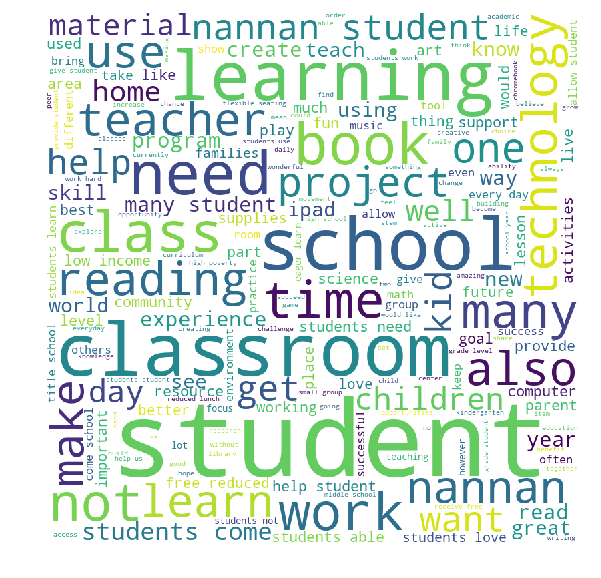

In [125]:
#www.geeksforgeeks.org/generating-word-cloud-python/amp/

comment_words = ' ' 
  
# iterate through the csv file 
for val in preprocessed_1_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
      
for val in preprocessed_1_title_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' ' 

  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Conclusion:- 
    
    Words like student, classroom, school, learning, not, book, technology, etc ocurred mostly in datapoints that were classified as flase postive in Set 1.

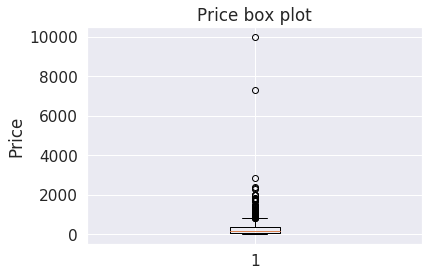

In [126]:
plt.boxplot(Xtest1_new['price'].values)
plt.ylabel('Price')
plt.title('Price box plot')
plt.show()

Text(0.5, 1.0, 'PDF of teacher_number_of_previously_posted_projects')

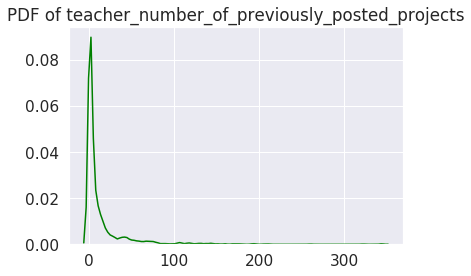

In [127]:
sns.distplot(Xtest1_new['teacher_number_of_previously_posted_projects'].values, hist=False, color='green')
plt.title('PDF of teacher_number_of_previously_posted_projects')

### 2.4.2 Applying DT on TFIDF,<font color='red'> SET 2</font>

In [128]:
auc_5=[]
auc_6=[]
best_depth_2 =  [1, 5, 10, 20, 50, 100, 500]

print(X_train_2.shape)
print(Ytr.shape)

(49041, 8858)
(49041,)


1. Best_Depth:-

In [129]:

from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth_2):
    clf=DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(X_train_2, Ytr)
    Y_1=clf.predict(X_train_2)
    roc_auc_1=roc_auc_score(Ytr, Y_1)
    auc_5.append(roc_auc_1)
    Y_2=clf.predict(X_cv_2)
    roc_auc_2=roc_auc_score(Ycv, Y_2)
    auc_6.append(roc_auc_2)

100%|██████████| 7/7 [05:59<00:00, 73.31s/it]


Auc values v/s best_depth plot:-

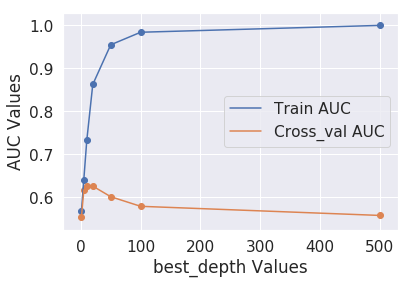

In [130]:
plt.plot(best_depth_2, auc_5, label='Train AUC')
plt.plot(best_depth_2, auc_6, label='Cross_val AUC')
plt.scatter(best_depth_2, auc_5)
plt.scatter(best_depth_2, auc_6)
plt.xlabel('best_depth Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [131]:
print('From the above plot, depth={} results on decent scores on both train and CV data'.format(20))

From the above plot, depth=20 results on decent scores on both train and CV data


2. Minimum Samples split:-

In [0]:
min_samples=[5, 10, 100, 500]
auc_7=[]
auc_8=[]


In [133]:
from sklearn.metrics import roc_auc_score
for i in tqdm(min_samples):
    clf=DecisionTreeClassifier(min_samples_split=i, class_weight='balanced')
    clf.fit(X_train_2, Ytr)
    Y_1=clf.predict(X_train_2)
    roc_auc_3=roc_auc_score(Ytr, Y_1)
    auc_7.append(roc_auc_3)
    Y_2=clf.predict(X_cv_2)
    roc_auc_4=roc_auc_score(Ycv, Y_2)
    auc_8.append(roc_auc_4)

100%|██████████| 4/4 [06:42<00:00, 98.93s/it] 


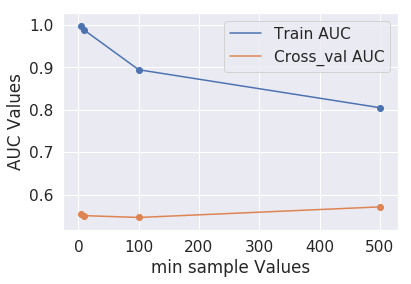

In [134]:
plt.plot(min_samples, auc_7, label='Train AUC')
plt.plot(min_samples, auc_8, label='Cross_val AUC')
plt.scatter(min_samples, auc_7)
plt.scatter(min_samples, auc_8)
plt.xlabel('min sample Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()


In [135]:
print('From the above plot, min_samples={} results on decent scores on both train and CV data'.format(500))

From the above plot, min_samples=500 results on decent scores on both train and CV data


# AUC on test data:-

In [136]:
clf=DecisionTreeClassifier(max_depth=20, min_samples_split=500, class_weight='balanced')
clf.fit(X_train_2, Ytr)
y_pred= clf.predict(X_test_2)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with max_depth={} and min_sample_split={} on test data is: {}'.format(20, 500, (roc_auc)))


The AUC score with max_depth=20 and min_sample_split=500 on test data is: 0.6231965663848946


# ROC Curve:-

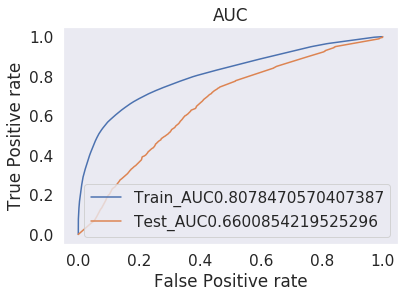

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=20,  min_samples_split=500, class_weight='balanced')
clf.fit(X_train_2, Ytr)
Y_1=clf.predict_proba(X_train_2)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_2)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [138]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(20, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=20 and min_split=500 on train and test data are 0.8078470570407387 and 0.6600854219525296


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=20, min_samples_split=500, class_weight='balanced')
clf.fit(X_train_2, Ytr)
Y_1=clf.predict(X_train_2)
Y_2=clf.predict(X_test_2)

In [0]:
conf_matrix_train2=pd.DataFrame(confusion_matrix(Ytr, Y_1))

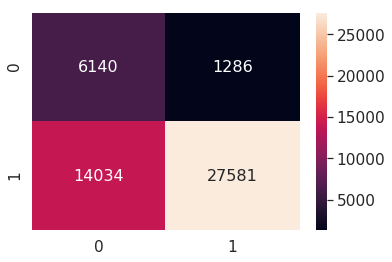

In [141]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matrix_train2, annot=True,annot_kws={"size": 16}, fmt='g')

# Confusion Matrix on Test data:-

In [142]:
confusion_matrix(Ytest, Y_2)

array([[ 3549,  1910],
       [12342, 18251]])

In [0]:
confusion_matrix_df2_test=pd.DataFrame(confusion_matrix(Ytest, Y_2))

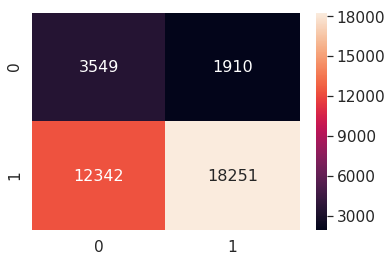

In [144]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(confusion_matrix_df2_test, annot=True,annot_kws={"size": 16}, fmt='g')

False Postives:-

In [0]:
fp2=[]
for i in range(len(Ytest)):
  if Ytest[i]==0 and Y_2[i]==1:
    fp2.append(i)


Xtest2_new=Xtest.iloc[fp2]

In [0]:
#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_2_new=[]

for sent in Xtest2_new['essay'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_2_new.append(sentance.strip())

#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_2_title_new=[]

for sent in Xtest2_new['project_title'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_2_title_new.append(sentance.strip())

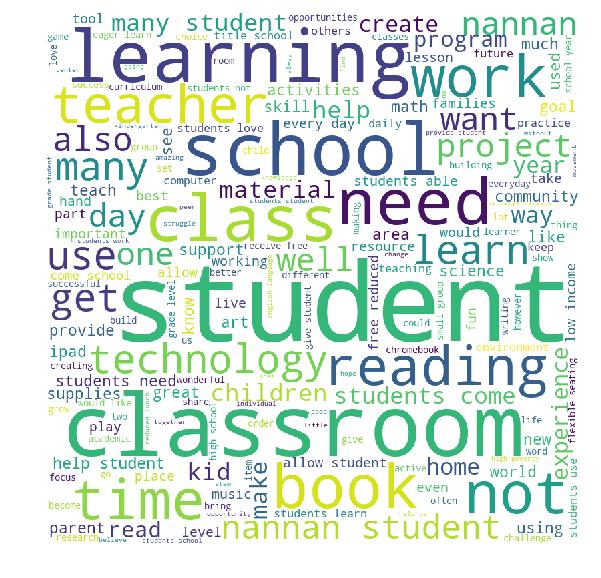

In [147]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

#Preprocessing essay from Xtest2_new before plotting wordcloud:-

comment_words = ' ' 
  
# iterate through the csv file 
for val in preprocessed_2_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
      
for val in preprocessed_2_title_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' ' 

  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Conclusion:-

Words like student, classroom, school, learning, not, book, technology, etc ocurred mostly in datapoints that were classified as flase postive in Set 1.

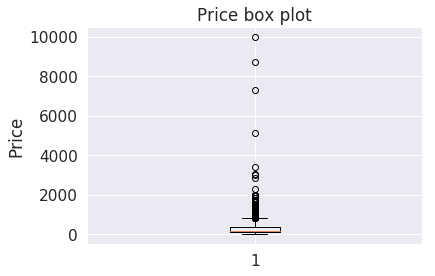

In [148]:
plt.boxplot(Xtest2_new['price'].values)
plt.ylabel('Price')
plt.title('Price box plot')
plt.show()

Text(0.5, 1.0, 'PDF of teacher_number_of_previously_posted_projects')

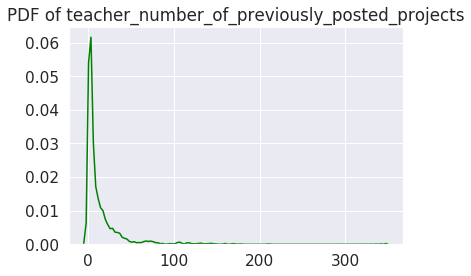

In [149]:
sns.distplot(Xtest2_new['teacher_number_of_previously_posted_projects'].values, hist=False, color='green')
plt.title('PDF of teacher_number_of_previously_posted_projects')

# 3. Applying Decision Tree on Avg_W2V, SET 3

In [0]:
auc1=[]
auc2=[]
best_depth_1 =  [1, 5, 10, 20, 50, 100, 500]

In [152]:
print(X_train_3.shape)
print(Ytr.shape)

(49041, 702)
(49041,)


1. Best Depth :-

In [153]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth_1):
    clf=DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(X_train_3, Ytr)
    Y_1=clf.predict(X_train_3)
    roc_auc_1=roc_auc_score(Ytr, Y_1)
    auc1.append(roc_auc_1)
    Y_2=clf.predict(X_cv_3)
    roc_auc_2=roc_auc_score(Ycv, Y_2) 
    auc2.append(roc_auc_2)

100%|██████████| 7/7 [13:30<00:00, 145.88s/it]


Best Depth v/s AUC :-

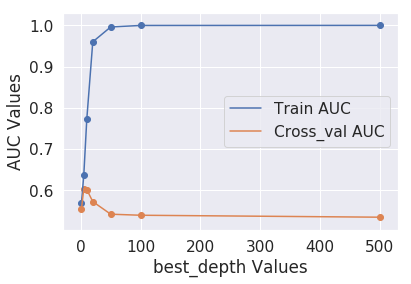

In [154]:
plt.plot(best_depth_1, auc1, label='Train AUC')
plt.plot(best_depth_1, auc2, label='Cross_val AUC')
plt.scatter(best_depth_1, auc1)
plt.scatter(best_depth_1, auc2)
plt.xlabel('best_depth Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [155]:
print('From the above plot, depth={} results on decent scores on both train and CV data'.format(10))

From the above plot, depth=10 results on decent scores on both train and CV data


Minimum No of Samples :-

In [156]:
min_samples=[5, 10, 100, 500]
auc_3=[]
auc_4=[]

from sklearn.metrics import roc_auc_score
for i in tqdm(min_samples):
    clf=DecisionTreeClassifier(min_samples_split=i, class_weight='balanced')
    clf.fit(X_train_3, Ytr)
    Y_1=clf.predict(X_train_3)
    roc_auc_3=roc_auc_score(Ytr, Y_1)
    auc_3.append(roc_auc_3)
    Y_2=clf.predict(X_cv_3)
    roc_auc_4=roc_auc_score(Ycv, Y_2)
    auc_4.append(roc_auc_4)

100%|██████████| 4/4 [10:08<00:00, 148.06s/it]


Minimum Samples v/s AUC :-

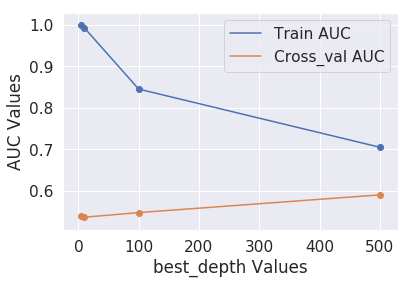

In [157]:
plt.plot(min_samples, auc_3, label='Train AUC')
plt.plot(min_samples, auc_4, label='Cross_val AUC')
plt.scatter(min_samples, auc_3)
plt.scatter(min_samples, auc_4)
plt.xlabel('best_depth Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [158]:
print('From the above plot, min_samples={} results on decent scores on both train and CV data'.format(400))

From the above plot, min_samples=400 results on decent scores on both train and CV data


# AUC on test data:-

In [160]:
clf=DecisionTreeClassifier(max_depth=10, min_samples_split=400, class_weight='balanced')
clf.fit(X_train_3, Ytr)
y_pred= clf.predict(X_test_3)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with max depth={} and min split={} on test data is: {}'.format(10, 400, (roc_auc)))

The AUC score with max depth=10 and min split=400 on test data is: 0.5924213189699434


# ROC on train and test data :-

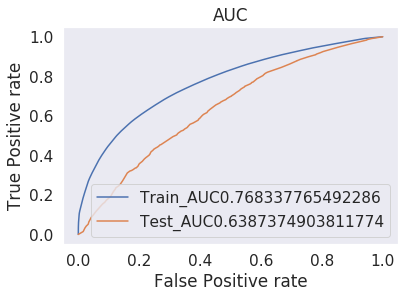

In [161]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10,  min_samples_split=400, class_weight='balanced')
clf.fit(X_train_3, Ytr)
Y_1=clf.predict_proba(X_train_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [162]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(10, 400, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=10 and min_split=400 on train and test data are 0.768337765492286 and 0.6387374903811774


# Confusion Matrix on Train data :-

In [163]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10, min_samples_split=400, class_weight='balanced')
clf.fit(X_train_3, Ytr)
Y_1=clf.predict(X_train_3)
Y_2=clf.predict(X_test_3)

print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[ 5618  1808]
 [14759 26856]]


In [0]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

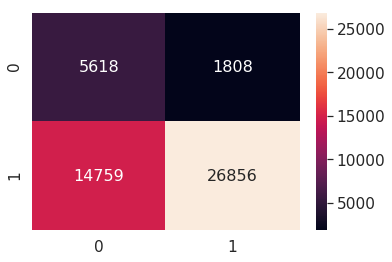

In [165]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_3, annot = True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data :-

In [166]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_2))

[[ 3307  2152]
 [12878 17715]]


In [0]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

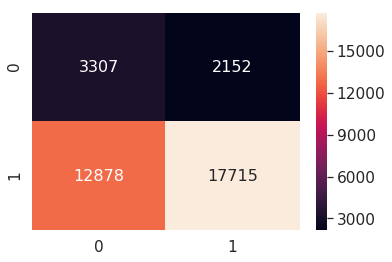

In [168]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_3, annot=True, annot_kws={'size':16}, fmt='g')

# False Postives :-

In [0]:
fp3=[]
for i in range(len(Ytest)):
  if Ytest[i]==0 and Y_2[i]==1:
    fp3.append(i)


Xtest3_new=Xtest.iloc[fp3]

In [0]:
#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_3_new=[]

for sent in Xtest3_new['essay'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_3_new.append(sentance.strip())

#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_3_title_new=[]

for sent in Xtest3_new['project_title'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_3_title_new.append(sentance.strip())


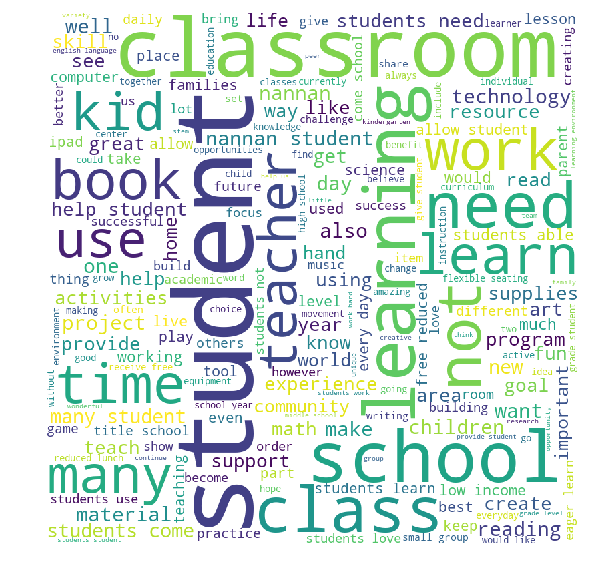

In [171]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

#Preprocessing essay from Xtest1_new before plotting wordcloud:-

comment_words = ' ' 
  
# iterate through the csv file 
for val in preprocessed_3_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
      
for val in preprocessed_3_title_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' ' 

  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



Conclusion:-

Words like student, classroom, school, learning, class, time, many, etc ocurred mostly in datapoints that were classified as flase postive in Set 3.

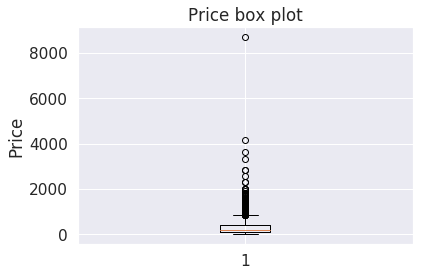

In [172]:
plt.boxplot(Xtest3_new['price'].values)
plt.ylabel('Price')
plt.title('Price box plot')
plt.show()


Text(0.5, 1.0, 'PDF of teacher_number_of_previously_posted_projects')

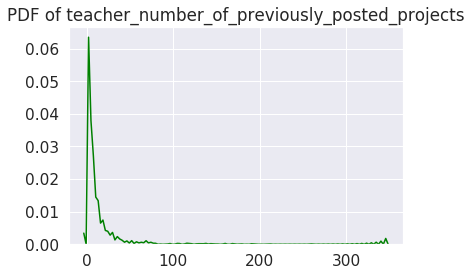

In [173]:
sns.distplot(Xtest3_new['teacher_number_of_previously_posted_projects'].values, hist=False, color='green')
plt.title('PDF of teacher_number_of_previously_posted_projects')

# 4. DECISION TREE On Set-4, using TFIDF_W2V:-

In [0]:
auc3=[]
auc4=[]

best_depth_2 =  [1, 5, 10, 20, 50, 100, 500]

1. Best Depth :-

In [176]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth_2):
    clf=DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    clf.fit(X_train_4, Ytr)
    Y_1=clf.predict(X_train_4)
    roc_auc_1=roc_auc_score(Ytr, Y_1)
    auc3.append(roc_auc_1)
    Y_2=clf.predict(X_cv_4)
    roc_auc_2=roc_auc_score(Ycv, Y_2)
    auc4.append(roc_auc_2)

100%|██████████| 7/7 [13:44<00:00, 148.51s/it]


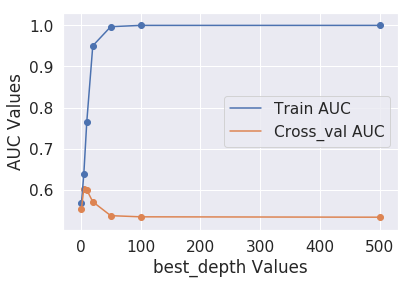

In [177]:
plt.plot(best_depth_2, auc3, label='Train AUC')
plt.plot(best_depth_2, auc4, label='Cross_val AUC')
plt.scatter(best_depth_2, auc3)
plt.scatter(best_depth_2, auc4)
plt.xlabel('best_depth Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [178]:
print('From the above plot, depth={} results on decent scores on both train and CV data'.format(10))

From the above plot, depth=10 results on decent scores on both train and CV data


Minimum No of Samples :-

In [180]:
min_samples=[5, 10, 100, 500]
auc_5=[]
auc_6=[]

from sklearn.metrics import roc_auc_score
for i in tqdm(min_samples):
    clf=DecisionTreeClassifier(min_samples_split=i, class_weight='balanced')
    clf.fit(X_train_4, Ytr)
    Y_1=clf.predict(X_train_4)
    roc_auc_3=roc_auc_score(Ytr, Y_1)
    auc_5.append(roc_auc_3)
    Y_2=clf.predict(X_cv_4)
    roc_auc_4=roc_auc_score(Ycv, Y_2)
    auc_6.append(roc_auc_4)


100%|██████████| 4/4 [10:36<00:00, 154.49s/it]


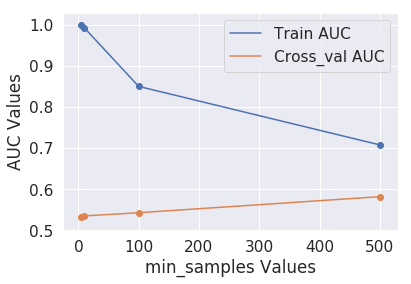

In [181]:
plt.plot(min_samples, auc_5, label='Train AUC')
plt.plot(min_samples, auc_6, label='Cross_val AUC')
plt.scatter(min_samples, auc_5)
plt.scatter(min_samples, auc_6)
plt.xlabel('min_samples Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

In [182]:
print('From the above plot, min_samples={} results on decent scores on both train and CV data'.format(500))


From the above plot, min_samples=500 results on decent scores on both train and CV data


ROC on train and test data:-

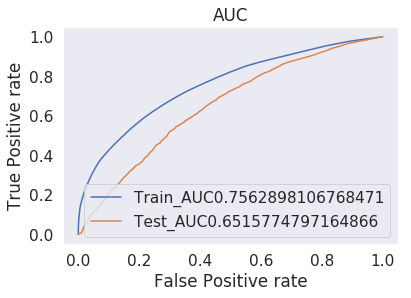

In [183]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10,  min_samples_split=500, class_weight='balanced')
clf.fit(X_train_4, Ytr)
Y_1=clf.predict_proba(X_train_4)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_4)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [184]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(10, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=10 and min_split=500 on train and test data are 0.7562898106768471 and 0.6515774797164866


# Confusion Matrix on Train data :-

In [186]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
clf.fit(X_train_4, Ytr)
Y_1=clf.predict(X_train_4)
Y_2=clf.predict(X_test_4)

print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[ 5490  1936]
 [15070 26545]]


In [0]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

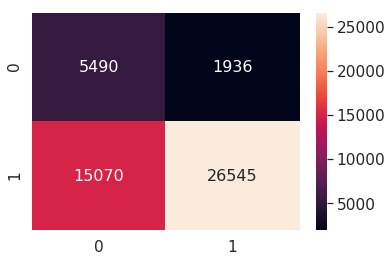

In [188]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_4, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data :-

In [189]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_2))

[[ 3558  1901]
 [13125 17468]]


In [0]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

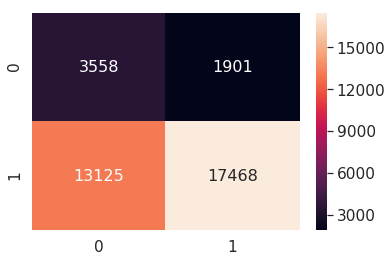

In [191]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_4, annot=True, annot_kws={'size':16}, fmt='g')

False Postives :-

In [0]:
fp4=[]
for i in range(len(Ytest)):
  if Ytest[i]==0 and Y_2[i]==1:
    fp4.append(i)


Xtest4_new=Xtest.iloc[fp4]

In [0]:
#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_4_new=[]

for sent in Xtest4_new['essay'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_4_new.append(sentance.strip())

#Preprocessing essay from Xtest1_new before plotting wordcloud:-

preprocessed_4_title_new=[]

for sent in Xtest4_new['project_title'].values:
  sent=sent.replace('\\r',' ')
  sent=sent.replace('\\n',' ')
  sent=sent.replace('\\"',' ')
  sent=re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
  sentance=decontracted(sent)
  preprocessed_4_title_new.append(sentance.strip())


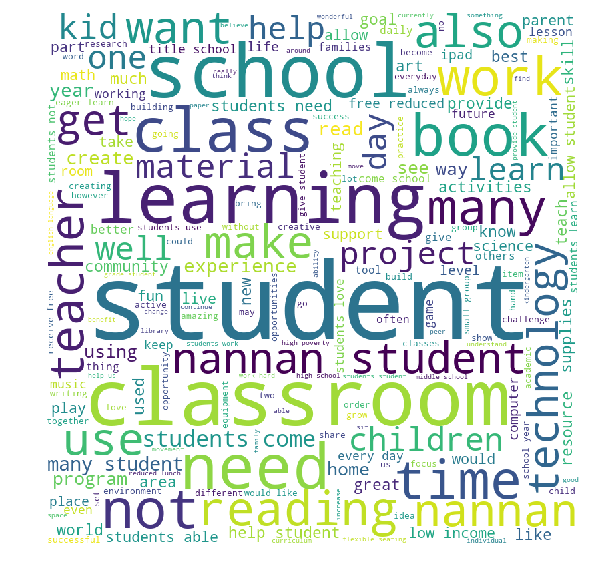

In [194]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

#Preprocessing essay from Xtest1_new before plotting wordcloud:-

comment_words = ' ' 
  
# iterate through the csv file 
for val in preprocessed_4_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
      
for val in preprocessed_4_title_new: 
  
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' ' 

  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

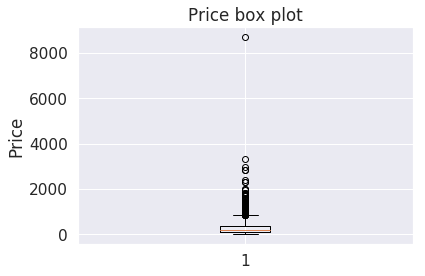

In [195]:
plt.boxplot(Xtest4_new['price'].values)
plt.ylabel('Price')
plt.title('Price box plot')
plt.show()

Text(0.5, 1.0, 'PDF of teacher_number_of_previously_posted_projects')

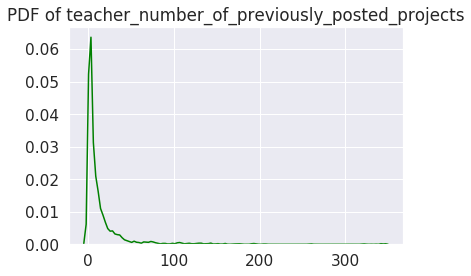

In [196]:
sns.distplot(Xtest4_new['teacher_number_of_previously_posted_projects'].values, hist=False, color='green')
plt.title('PDF of teacher_number_of_previously_posted_projects')

# SET-5 :-

In [198]:
X_train_1.shape

(49041, 8858)

In [199]:
Ytr.shape

(49041,)

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


In [201]:
from scipy.sparse import hstack
X_train_1 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, bow1, bow4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_1.shape

(49041, 8858)

In [0]:
labels=[]

In [0]:
for i in vectorizer_1.get_feature_names():
  labels.append(i)
  
for i in vectorizer_2.get_feature_names():
  labels.append(i)

for i in vectorizer_3.get_feature_names():
  labels.append(i)
  
for i in vectorizer_4.get_feature_names():
  labels.append(i)
  
for i in vectorizer_5.get_feature_names():
  labels.append(i)
  
for i in vectorizer_6.get_feature_names():
  labels.append(i)
  
for i in vectorizer_7.get_feature_names():
  labels.append(i)
  
labels.append('price')
labels.append('previously posted projects')
labels.append('quantity')

In [204]:
len(labels)# No of words in title:-

8858

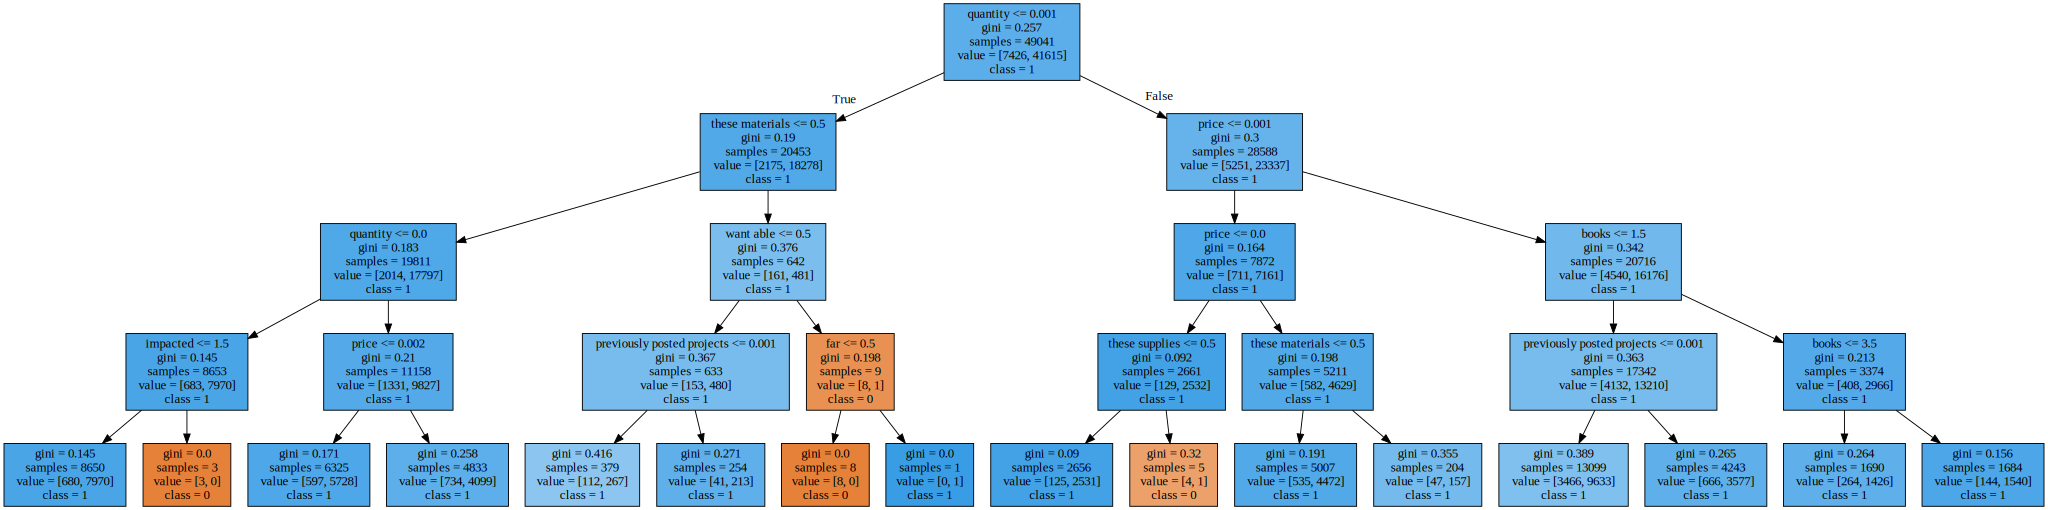

In [205]:
#https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

estimator = DecisionTreeClassifier(max_depth=4)
estimator.fit(X_train_1, Ytr)
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))


In [0]:
labels1=[]

for i in vectorizer_1.get_feature_names():
  labels1.append(i)
  
for i in vectorizer_2.get_feature_names():
  labels1.append(i)

for i in vectorizer_3.get_feature_names():
  labels1.append(i)
  
for i in vectorizer_4.get_feature_names():
  labels1.append(i)
  
for i in vectorizer_5.get_feature_names():
  labels1.append(i)
  
for i in vectorizer_8.get_feature_names():
  labels1.append(i)
  
for i in vectorizer_9.get_feature_names():
  labels1.append(i)
  
labels1.append('price')
labels1.append('previously posted projects')
labels1.append('quantity')

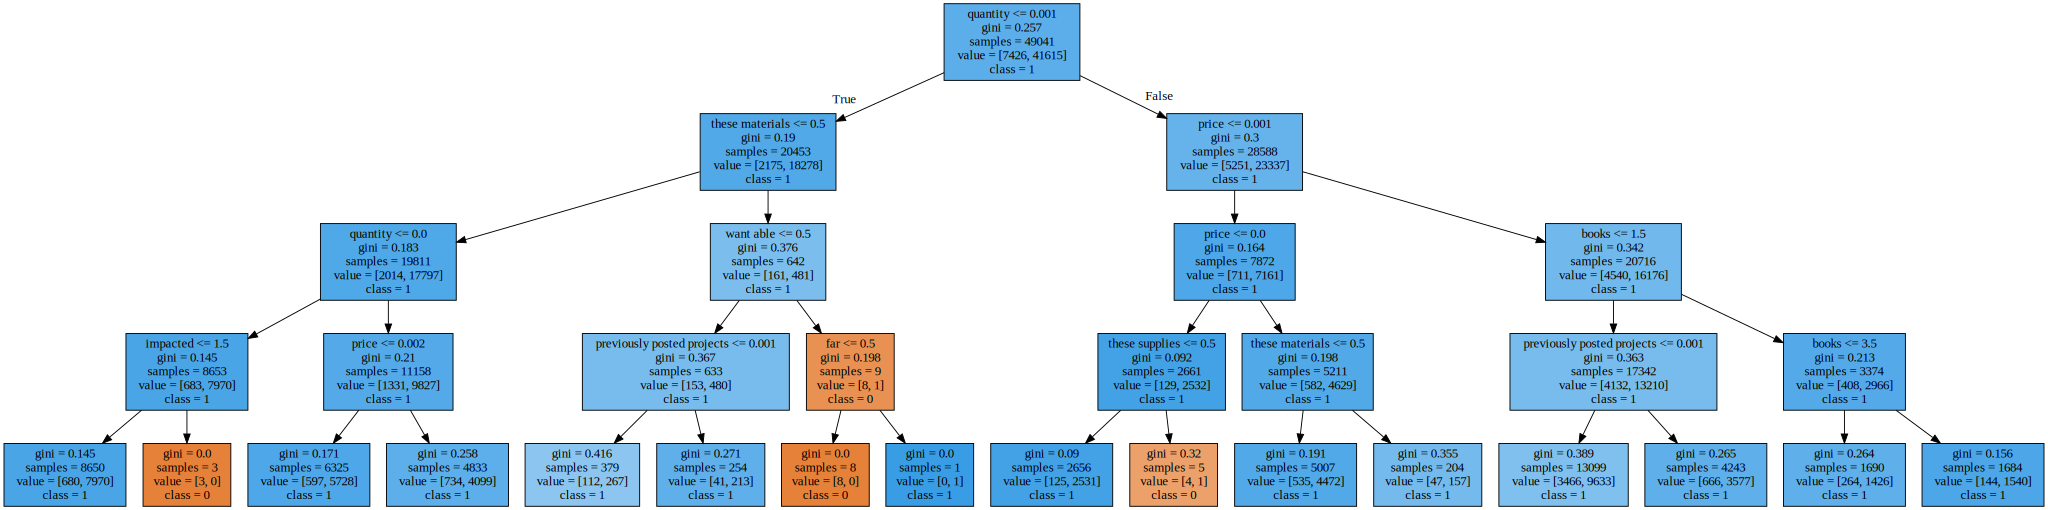

In [207]:
#https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

estimator2 = DecisionTreeClassifier(max_depth=4)
estimator2.fit(X_train_2, Ytr)
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels1, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))


# Set 5:-

5K important features from Set 2:-

In [0]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features

In [0]:

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

clf = DecisionTreeClassifier(random_state=0, max_depth=20, min_samples_split=500, class_weight='balanced')

clf = clf.fit(X_train_2, Ytr)

In [0]:
importances=clf.feature_importances_
sorted_importances=importances.argsort()
top_5k_features = sorted_importances[::-1]

In [214]:
print(sorted_importances)
print(top_5k_features)

[   0 5923 5922 ... 2931 8857 8855]
[8855 8857 2931 ... 5922 5923    0]


In [216]:
type(X_train_2)

scipy.sparse.coo.coo_matrix

In [0]:
X_tr_new = X_train_2.tocsr()[:,list(top_5k_features)]
X_test_new = X_test_2.tocsr()[:,list(top_5k_features)]
X_cv_new = X_cv_2.tocsr()[:,list(top_5k_features)]

# DECISION TREE on SET 5:-

In [0]:
from sklearn.linear_model import LogisticRegression

auc_1=[]
auc_2=[]
C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [229]:
for i in tqdm(C):
  clf=LogisticRegression(C=i, class_weight='balanced')
  clf.fit(X_new, Ytr)
  Y_1=clf.predict(X_new)
  roc_auc_1=roc_auc_score(Ytr, Y_1)
  Y_2=clf.predict(X_cv_2)
  roc_auc_2=roc_auc_score(Ycv, Y_2)
  auc_1.append(roc_auc_1)
  auc_2.append(roc_auc_2)


100%|██████████| 9/9 [06:52<00:00, 92.67s/it]


# Plot of AUC v/s C:-

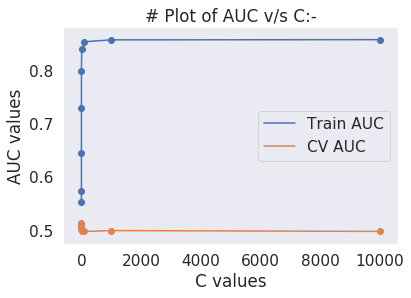

In [232]:
plt.plot(C, auc_1, label='Train AUC')
plt.plot(C, auc_2, label='CV AUC')
plt.scatter(C, auc_1)
plt.scatter(C, auc_2)
plt.xlabel('C values')
plt.ylabel('AUC values')
plt.title('# Plot of AUC v/s C:-')
plt.grid()
plt.legend()
plt.show()

# ROC on train and test data:-

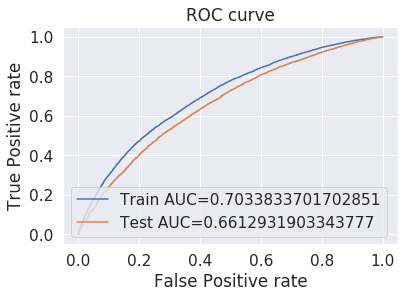

In [236]:
clf = LogisticRegression(C = 0.01, class_weight='balanced')
clf.fit(X_tr_new, Ytr)
Y_1 = clf.predict_proba(X_tr_new)
Y_1=Y_1[:,1]
Y_2 = clf.predict_proba(X_test_new)
Y_2=Y_2[:,1]
train_fpr, train_tpr, train_th = roc_curve(Ytr, Y_1)
test_fpr, test_tpr, test_th = roc_curve(Ytest, Y_2)
plt.plot(train_fpr, train_tpr, label='Train AUC='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# CONFUSION MATRIX ON TRAIN DATA:-

[[ 4823  2603]
 [14911 26704]]


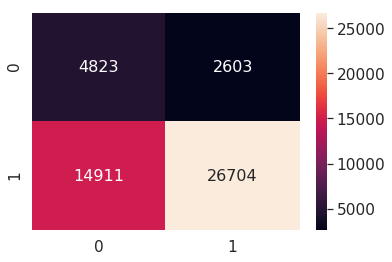

In [238]:
clf = LogisticRegression(C = 0.01, class_weight='balanced')
clf.fit(X_tr_new, Ytr)
Y_1 = clf.predict(X_tr_new)

print(confusion_matrix(Ytr, Y_1))

cm_df_train = pd.DataFrame(confusion_matrix(Ytr, Y_1))

sns.set(font_scale=1.4)
sns.heatmap(cm_df_train, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data :-

[[ 3239  2220]
 [11050 19543]]


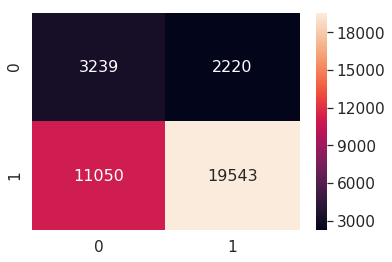

In [239]:
Y_2 = clf.predict(X_test_new)

print(confusion_matrix(Ytest, Y_2))

cm_df_test = pd.DataFrame(confusion_matrix(Ytest, Y_2))

sns.set(font_scale=1.4)
sns.heatmap(cm_df_test, annot=True, annot_kws={'size':16}, fmt='g')

# Plotting PrettyTable with results:-

In [6]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names=['Techniques', 'Max depth', 'Min samples split', 'Train AUC', 'Test AUC']
x.add_row(['TFIDF W2V', '10', '500', '0.75' , '0.65'])
x.add_row(['AVG W2V', '10', '400', '0.77' , '0.64'])
x.add_row(['TFIDF', '20', '500', '0.81' , '0.66'])
x.add_row(['BOW', '10', '500', '0.73' , '0.69'])
x.add_row(['Select_5k_best_LR', 'C = 0.01', 'NA', '0.0703' , '0.66'])

print(x)

+-------------------+-----------+-------------------+-----------+----------+
|     Techniques    | Max depth | Min samples split | Train AUC | Test AUC |
+-------------------+-----------+-------------------+-----------+----------+
|     TFIDF W2V     |     10    |        500        |    0.75   |   0.65   |
|      AVG W2V      |     10    |        400        |    0.77   |   0.64   |
|       TFIDF       |     20    |        500        |    0.81   |   0.66   |
|        BOW        |     10    |        500        |    0.73   |   0.69   |
| Select_5k_best_LR |  C = 0.01 |         NA        |   0.0703  |   0.66   |
+-------------------+-----------+-------------------+-----------+----------+


# Conclusions:-
    
    1. DT model trained on BOW data performed the best on test data.
    
    2. DT model trained on TFIDF data performed the best considering both train and test data.
    
    3. DT model trained on AVG W2V and TFIDF W2V data performed similarly on the train and test data but the performance was lesser than the BOW and TFIDF models.
    
    4. LR model trained on top 5k features obtained from the DT model has the least train data scores but the Test data score is better tgan AVGW2V and TFIDF W2V models.